<a href="https://colab.research.google.com/github/IsmaelOr/BEDU_MachineLearning_Equipo9/blob/main/proyecto_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Machine Learning

## Introducción
Enfermedades cardiovasculares
Las enfermedades cardiovasculares constituyen la primera causa de muerte en el mundo y se prevé que lo sigan siendo, debido al envejecimiento de la población y la prevalencia de dichas enfermedades en países de bajos recursos. Las enfermedades cardiovasculares son enfermedades del sistema circulatorio, de etiología y localización diversas. Se clasifican en cuatro tipos generales:

* Enfermedades isquémicas del corazón
* Enfermedades cerebrovasculares
* Enfermedades vasculares periféricas
* Otras enfermedades.

Las dos primeras, las de importancia mayor en magnitud, son responsables de más del 60% de la mortalidad cardiovascular total. Suelen manifestarse como fenómenos agudos. Se deben, sobre todo, a la obstrucción de los vasos, que impide que la sangre fluya hacia el corazón o el cerebro y termina produciendo la muerte.

Las enfermedades vasculares periféricas afectan a las arterias o a las venas que irrigan las piernas y los brazos. Provocan dificultades para la circulación de la sangre y comportan estrechamiento de los vasos, hinchazón y dolor. Pueden causar isquemia. Cuando afectan a las venas se forman coágulos (trombos) que dan lugar a trombosis venosa. Entre las "otras enfermedades cardiovasculares" destacan las cardiopatías congénitas y la cardiopatía reumática.

Las enfermedades cardiovasculares constituyen la primera causa de mortalidad afectando tanto a países desarrollados como a los de bajo desarrollo. En el trastorno cardiovascular interactúan tanto la susceptibilidad genética del individuo como los factores ambientales (tabaquismo,sedentarismo y dieta).

El riesgo cardiovascular se define como la probabilidad de padecer un evento cardiovascular en un determinado período. La predicción del riesgo cardiovascular ha constituido, en los últimos años, la piedra angular en las guías clínicas de prevención cardiovascular, y deviene una herramienta útil del Médico de Familia para establecer prioridades en la atención primaria, mejorando la atención a los pacientes y eligiendo más eficazmente la terapéutica a seguir, con el objetivo de acercarnos más a la realidad multifactorial de las enfermedades cardiovasculares y a su prevención.

## Postwork 1 - Introducción a Machine Learning

Para nuestro proyecto nos basamos en este Dataset: link

¿Qué contiene nuestro Dataset?
* Alrededor de 60,000 datos que corresponden al estudio de enfermedades cardiovasculares.
* 6 variables numéricas (edad, estatura, peso, imc, presión sistólica y presión diastólica).
* 7 variables categóricas (género, colesterol, glucosa, tabaco, alcohol, actividad física y enfermedad cardiovascular).

## Postwork 2

In [132]:
import pandas as pd

from scipy import stats
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis

import pprint as pp

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_validate

import plotly.express as px

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.metrics import roc_curve, auc

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures

from sklearn import tree as treeClassifier

from sklearn.ensemble import RandomForestClassifier as forest

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/IsmaelOr/BEDU_MachineLearning_Equipo9/main/Files/enfermedades_cardiovasculares.csv', index_col = 0)

df.head()

,edad,genero,estatura,peso,imc,presion_sistolica,presion_diastolica,colesterol,glucosa,tabaco,alcohol,act_fisica,enfermedad_cardiovascular
0,50,2,168,62.0,21.97,110,80,1,1,0,0,1,0
1,55,1,156,85.0,34.93,140,90,3,1,0,0,1,1
2,51,1,165,64.0,23.51,130,70,3,1,0,0,0,1
3,48,2,169,82.0,28.71,150,100,1,1,0,0,1,1
5,60,1,151,67.0,29.38,120,80,2,2,0,0,0,0


In [ ]:
def particionar(entradas, salidas, porcentaje_entrenamiento, porcentaje_prueba):
    x_train, x_test, y_train, y_test = train_test_split(entradas, salidas, test_size = porcentaje_prueba)
    return [x_train, x_test, y_train, y_test]

def kfold_function(data_x, k):
  muestras = []
  n = []
  random_seed = 48
  kfold = KFold(n_splits= k, shuffle= True, random_state= random_seed)
  
  for indices_train, indices_test in kfold.split(data_x):
    n.append(indices_train)
    n.append(indices_test)
    muestras.append(n)
    n = []

  return muestras

def LOOCV_function(data_x):
  muestras = []
  n = []
  random_seed = 48
  kfold = KFold(n_splits= data_x.shape[0], shuffle= True, random_state= random_seed)
  
  for indices_train, indices_test in kfold.split(data_x):
    n.append(indices_train)
    n.append(indices_test)
    muestras.append(n)
    n = []

  return muestras

def Matrix_confusion(y_esperados, y_predichos):
  resultado = confusion_matrix(y_esperados, y_predichos)
  print(resultado)

  (TP, FN, FP, TN) = resultado.ravel()

  print("\nTrue positives: "+str(TP))
  print("True negatives: "+str(TN))
  print("False positives: "+str(FP))
  print("False negative: "+str(FN))

  accuracy = (TP + TN) * 100 / (TP + TN + FP + FN)
  sensibilidad = TP * 100 / (TP + FN)
  especificidad = TN * 100 / (TN + FP)

  print("\nPrecision:"+str(accuracy)+"%")
  print("Sensibilidad:"+str(sensibilidad)+"%")
  print("Especificidad:"+str(especificidad)+"%")

def centroideCercano(muestra, listaCentroides):
    listaDistancias = distEuclidiana(muestra, listaCentroides)
    centroideCercano = np.argmin(listaDistancias)
    return centroideCercano

def distEuclidiana(muestra, dataset):
    distancias = np.zeros((dataset.shape[0], 1))
    for counter in range(0,dataset.shape[0]):
        distancias[counter] = np.linalg.norm(muestra-dataset[counter])
    return distancias

def clasificarPorCentroides(muestras, centroides):
    resultado = np.zeros((muestras.shape[0], 1))
    for counter in range(0, muestras.shape[0]):
        resultado[counter] = centroideCercano(muestras[counter], centroides)
    return resultado

## Postwork 3

In [ ]:
X = df[['peso', 'imc']].values

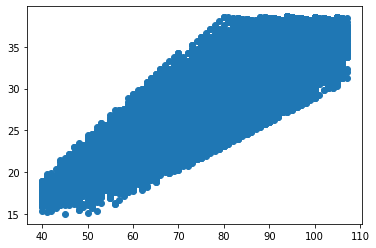

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [ ]:
var_numericas = ['edad', 'estatura', 'peso', 'imc', 'presion_sistolica', 'presion_diastolica']
df_numericas = df[var_numericas]

var_categoricas = df[['act_fisica', 'genero', 'colesterol', 'glucosa', 'tabaco', 'alcohol', 'enfermedad_cardiovascular']]

In [ ]:
inertia = []
for i in range(1,10):
    kmeans = cluster.KMeans (n_clusters = i, init='k-means++', random_state=18)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [ ]:
silueta = {}
for i in range(2,10):
    kmeans = cluster.KMeans (n_clusters = i, init='k-means++', random_state=18, n_init=15, max_iter=500)
    kmeans.fit(X)
    silueta[i] = silhouette_score(X, kmeans.labels_, metric='euclidean')

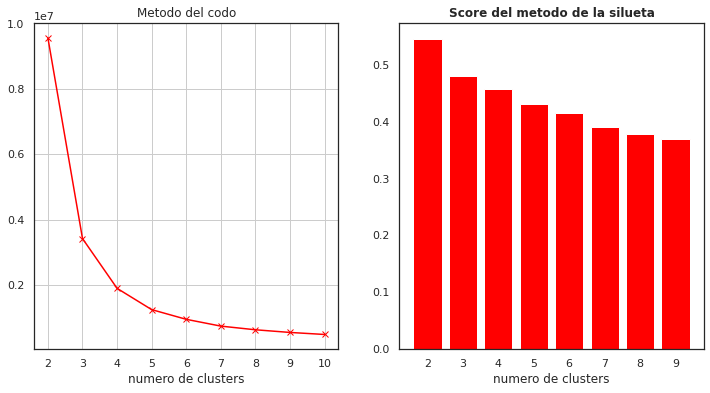

In [ ]:
sns.set(style= 'white', rc={'figure.figsize':(12,6)})
plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2),inertia, marker='x', color='red')
plt.xlabel('numero de clusters')
plt.title('Metodo del codo')
plt.grid (True)

plt.subplot(1,2,2)
plt.bar(range(len(silueta)),list(silueta.values()), align='center', color='red')
plt.xticks(range(len(silueta)),list(silueta.keys()))
plt.title('Score del metodo de la silueta', fontweight= 'bold')
plt.xlabel('numero de clusters')
plt.show()

Podemos ver que en el método del codo, el primer punto de quiebre es 3 y el segundo 4. Por lo que primero ocuparemos 3 clusters.

[[60.43530921 23.18444693]
 [89.66893544 32.23357686]
 [73.61806357 26.99053327]]


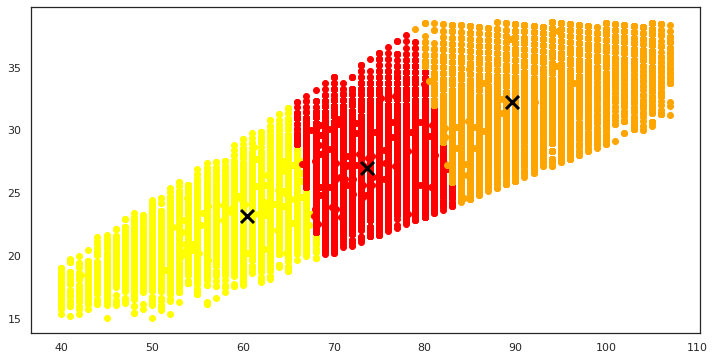

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(X)
centroides = kmeans.cluster_centers_
print(centroides)

clusters = kmeans.fit_predict(X)
df['label'] = clusters

plt.scatter(df.peso[df.label == 0], df.imc[df.label == 0], color = 'yellow')
plt.scatter(df.peso[df.label == 1], df.imc[df.label == 1], color = 'red')
plt.scatter(df.peso[df.label == 2], df.imc[df.label == 2], color = 'orange')

plt.scatter(centroides[:,0], centroides[:,1],marker='x', s=169, linewidths=3,
            color='black', zorder=10,lw=3) 
plt.show()

[[68.56640558 25.35802984]
 [93.19096821 33.21212066]
 [57.65652803 22.44805722]
 [79.54373983 29.08472579]]


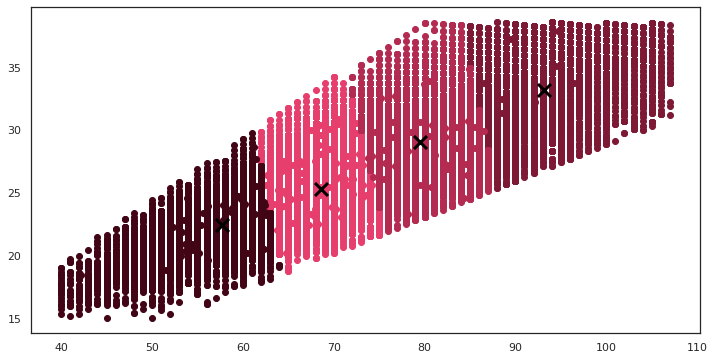

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(X)
centroides = kmeans.cluster_centers_
print(centroides)

clusters = kmeans.fit_predict(X)
df['label'] = clusters

plt.scatter(df.peso[df.label == 0], df.imc[df.label == 0], color = '#E63E6D')
plt.scatter(df.peso[df.label == 1], df.imc[df.label == 1], color = '#7D1935')
plt.scatter(df.peso[df.label == 2], df.imc[df.label == 2], color = '#420516')
plt.scatter(df.peso[df.label == 3], df.imc[df.label == 3], color = '#B42B51')

plt.scatter(centroides[:, 0], centroides[:, 1], marker = 'x', s = 169, linewidths = 3,
            color = 'black', zorder = 10, lw = 3) 
plt.show()

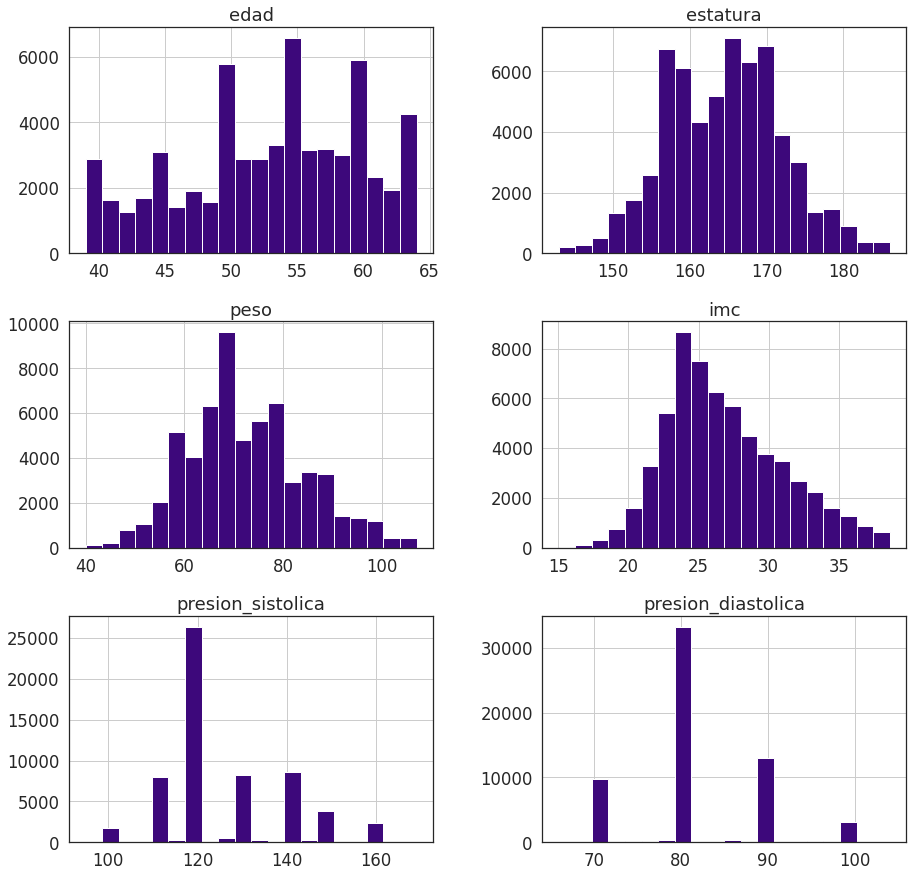

In [ ]:
sns.set(style = 'white', font_scale = 1.5, rc = {'figure.figsize': (15, 15)})
ax = df_numericas.hist(bins = 20, color = '#3D087B')

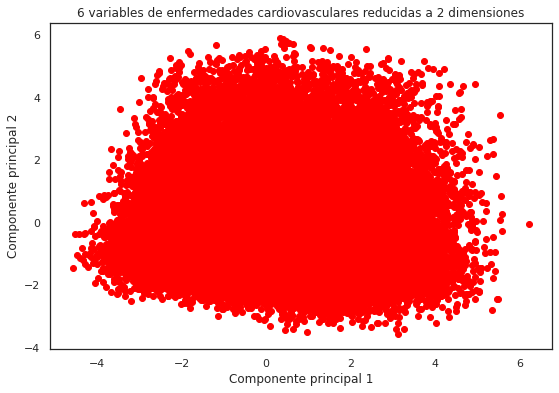

In [ ]:
std_scaler = StandardScaler()
data_cluster = df.copy()
data_cluster[data_cluster.columns] = std_scaler.fit_transform(data_cluster)

pca_2 = PCA(2)
pca_2_resultados = pca_2.fit_transform(data_cluster)

sns.set(style = 'white', rc = {'figure.figsize': (9, 6)})
plt.scatter(x=pca_2_resultados[:, 0], y = pca_2_resultados[:, 1], color = 'red')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('6 variables de enfermedades cardiovasculares reducidas a 2 dimensiones')
plt.show()

## Postwork 4

<Figure size 720x720 with 0 Axes>

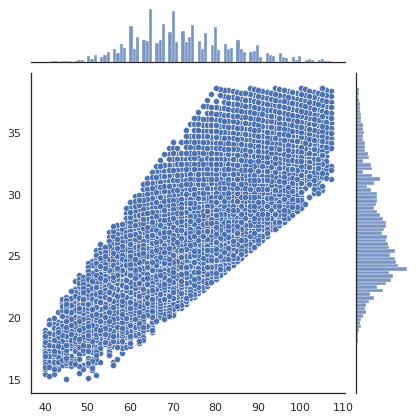

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.peso.values, y=df.imc.values)
plt.ylabel('IMC', fontsize=12)
plt.xlabel('Peso', fontsize=12)
plt.show()

In [ ]:
x = df[['edad', 'estatura', 'peso', 'imc', 'presion_sistolica', 'presion_diastolica']].values
y = df[['enfermedad_cardiovascular']].values

In [ ]:
x_train, x_test, y_train, y_test = particionar(x, y, 0.7, 0.3)

In [ ]:
regressor = LinearRegression()
prediccion = regressor.fit(x_train, y_train)

In [ ]:
regressor.score(x_test, y_test)

0.21377144962489114

In [ ]:
datos_persona = np.array([[24, 180, 80, 24.48, 180, 80]])
print(f'Predicción: {prediccion.predict(datos_persona)}% de que esta persona tenga una enfermedad cardiovascular')

Predicción: [[0.84335477]]% de que esta persona tenga una enfermedad cardiovascular


In [ ]:
x = df.drop(columns=['enfermedad_cardiovascular']).values
y = df[['enfermedad_cardiovascular']].values

In [ ]:
x_train, x_test, y_train, y_test = particionar(x, y, 0.7, 0.3)

In [ ]:
regressor = LinearRegression()
prediccion = regressor.fit(x_train, y_train)

In [ ]:
regressor.score(x_test, y_test)

0.22999179596037708

In [ ]:
x = df['estatura'].values
y = df['imc'].values

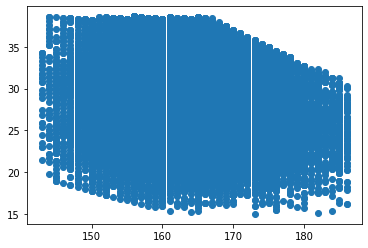

In [ ]:

plt.scatter(x,y)
plt.show()

In [ ]:
# Hagamos una regresión polinomial, con una recta de regresión estimada como
# y = b0 + b1*x +b2*x^2 + b3*x^3 + ... + bn*x^n
polynominal_regression = PolynomialFeatures(degree=20)
x_polynomial = polynominal_regression.fit_transform(x,y)

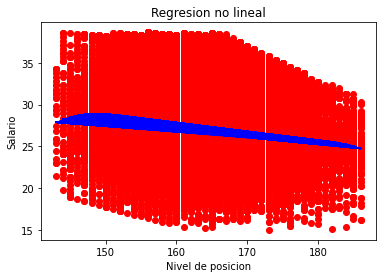

In [ ]:
# Hagamos el fit de los datos
linear_regression = LinearRegression()
linear_regression.fit(x_polynomial,y)

# Veamos como se ajusta la nueva regresión polinomica
y_head2 = linear_regression.predict(x_polynomial)

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Regresion no lineal')
plt.xlabel('Nivel de posicion')
plt.ylabel('Salario')
plt.show()

In [ ]:
# Calculemos el R^2

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y,y_head2))

r_square score:  0.04409541273327455


## Postwork 5

In [78]:
df.head()

,edad,genero,estatura,peso,imc,presion_sistolica,presion_diastolica,colesterol,glucosa,tabaco,alcohol,act_fisica,enfermedad_cardiovascular,label
0,50,2,168,62.0,21.97,110,80,1,1,0,0,1,0,2
1,55,1,156,85.0,34.93,140,90,3,1,0,0,1,1,3
2,51,1,165,64.0,23.51,130,70,3,1,0,0,0,1,0
3,48,2,169,82.0,28.71,150,100,1,1,0,0,1,1,3
5,60,1,151,67.0,29.38,120,80,2,2,0,0,0,0,0


In [116]:
y = df['enfermedad_cardiovascular'].values
x = df[['genero', 'colesterol', 'glucosa', 'tabaco', 'alcohol', 'act_fisica']].values

In [118]:
arbol = treeClassifier.DecisionTreeClassifier()
arbol = arbol.fit(x, y)

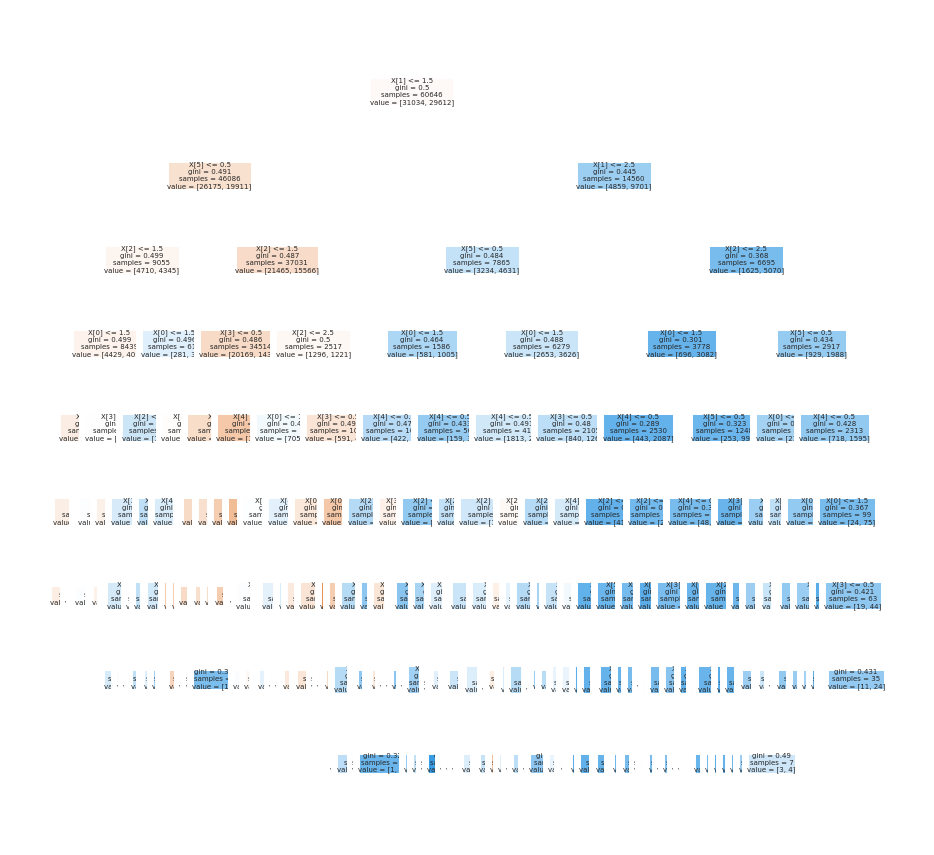

In [122]:
plt.figure(figsize = (2, 2), dpi = 500)
treeClassifier.plot_tree(arbol, filled = True)
plt.show()

In [131]:
caracteristicas = np.array([[1, 1, 1, 0, 0, 1]], dtype = np.int16)

print(f'La predicción para la predisposición para padecer una enfermedad cardiovascular: {"Positiva" if arbol.predict(caracteristicas)[0] else "Negativa"}')

La predicción para la predisposición para padecer una enfermedad cardiovascular: Negativa


In [167]:
# NO OLVIDAR COMENTAR
bosque = forest(n_estimators = 800, random_state = 7)
bosque.fit(x, y)

c1 = np.array([[1, 1, 1, 0, 0, 1]], dtype = np.int16)
c2 = np.array([[1, 2, 1, 0, 0, 1]], dtype = np.int16)
c3 = np.array([[1, 1, 1, 1, 0, 1]], dtype = np.int16)
c4 = np.array([[1, 1, 1, 0, 1, 0]], dtype = np.int16)

print(f'Paciente 1 | Características 1: {"Positiva" if bosque.predict(c1)[0] else "Negativa"}')
print(f'Paciente 1 | Características 2: {"Positiva" if bosque.predict(c2)[0] else "Negativa"}')
print(f'Paciente 1 | Características 3: {"Positiva" if bosque.predict(c3)[0] else "Negativa"}')
print(f'Paciente 1 | Características 4: {"Positiva" if bosque.predict(c4)[0] else "Negativa"}')

Paciente 1 | Características 1: Negativa
Paciente 1 | Características 2: Positiva
Paciente 1 | Características 3: Negativa
Paciente 1 | Características 4: Negativa


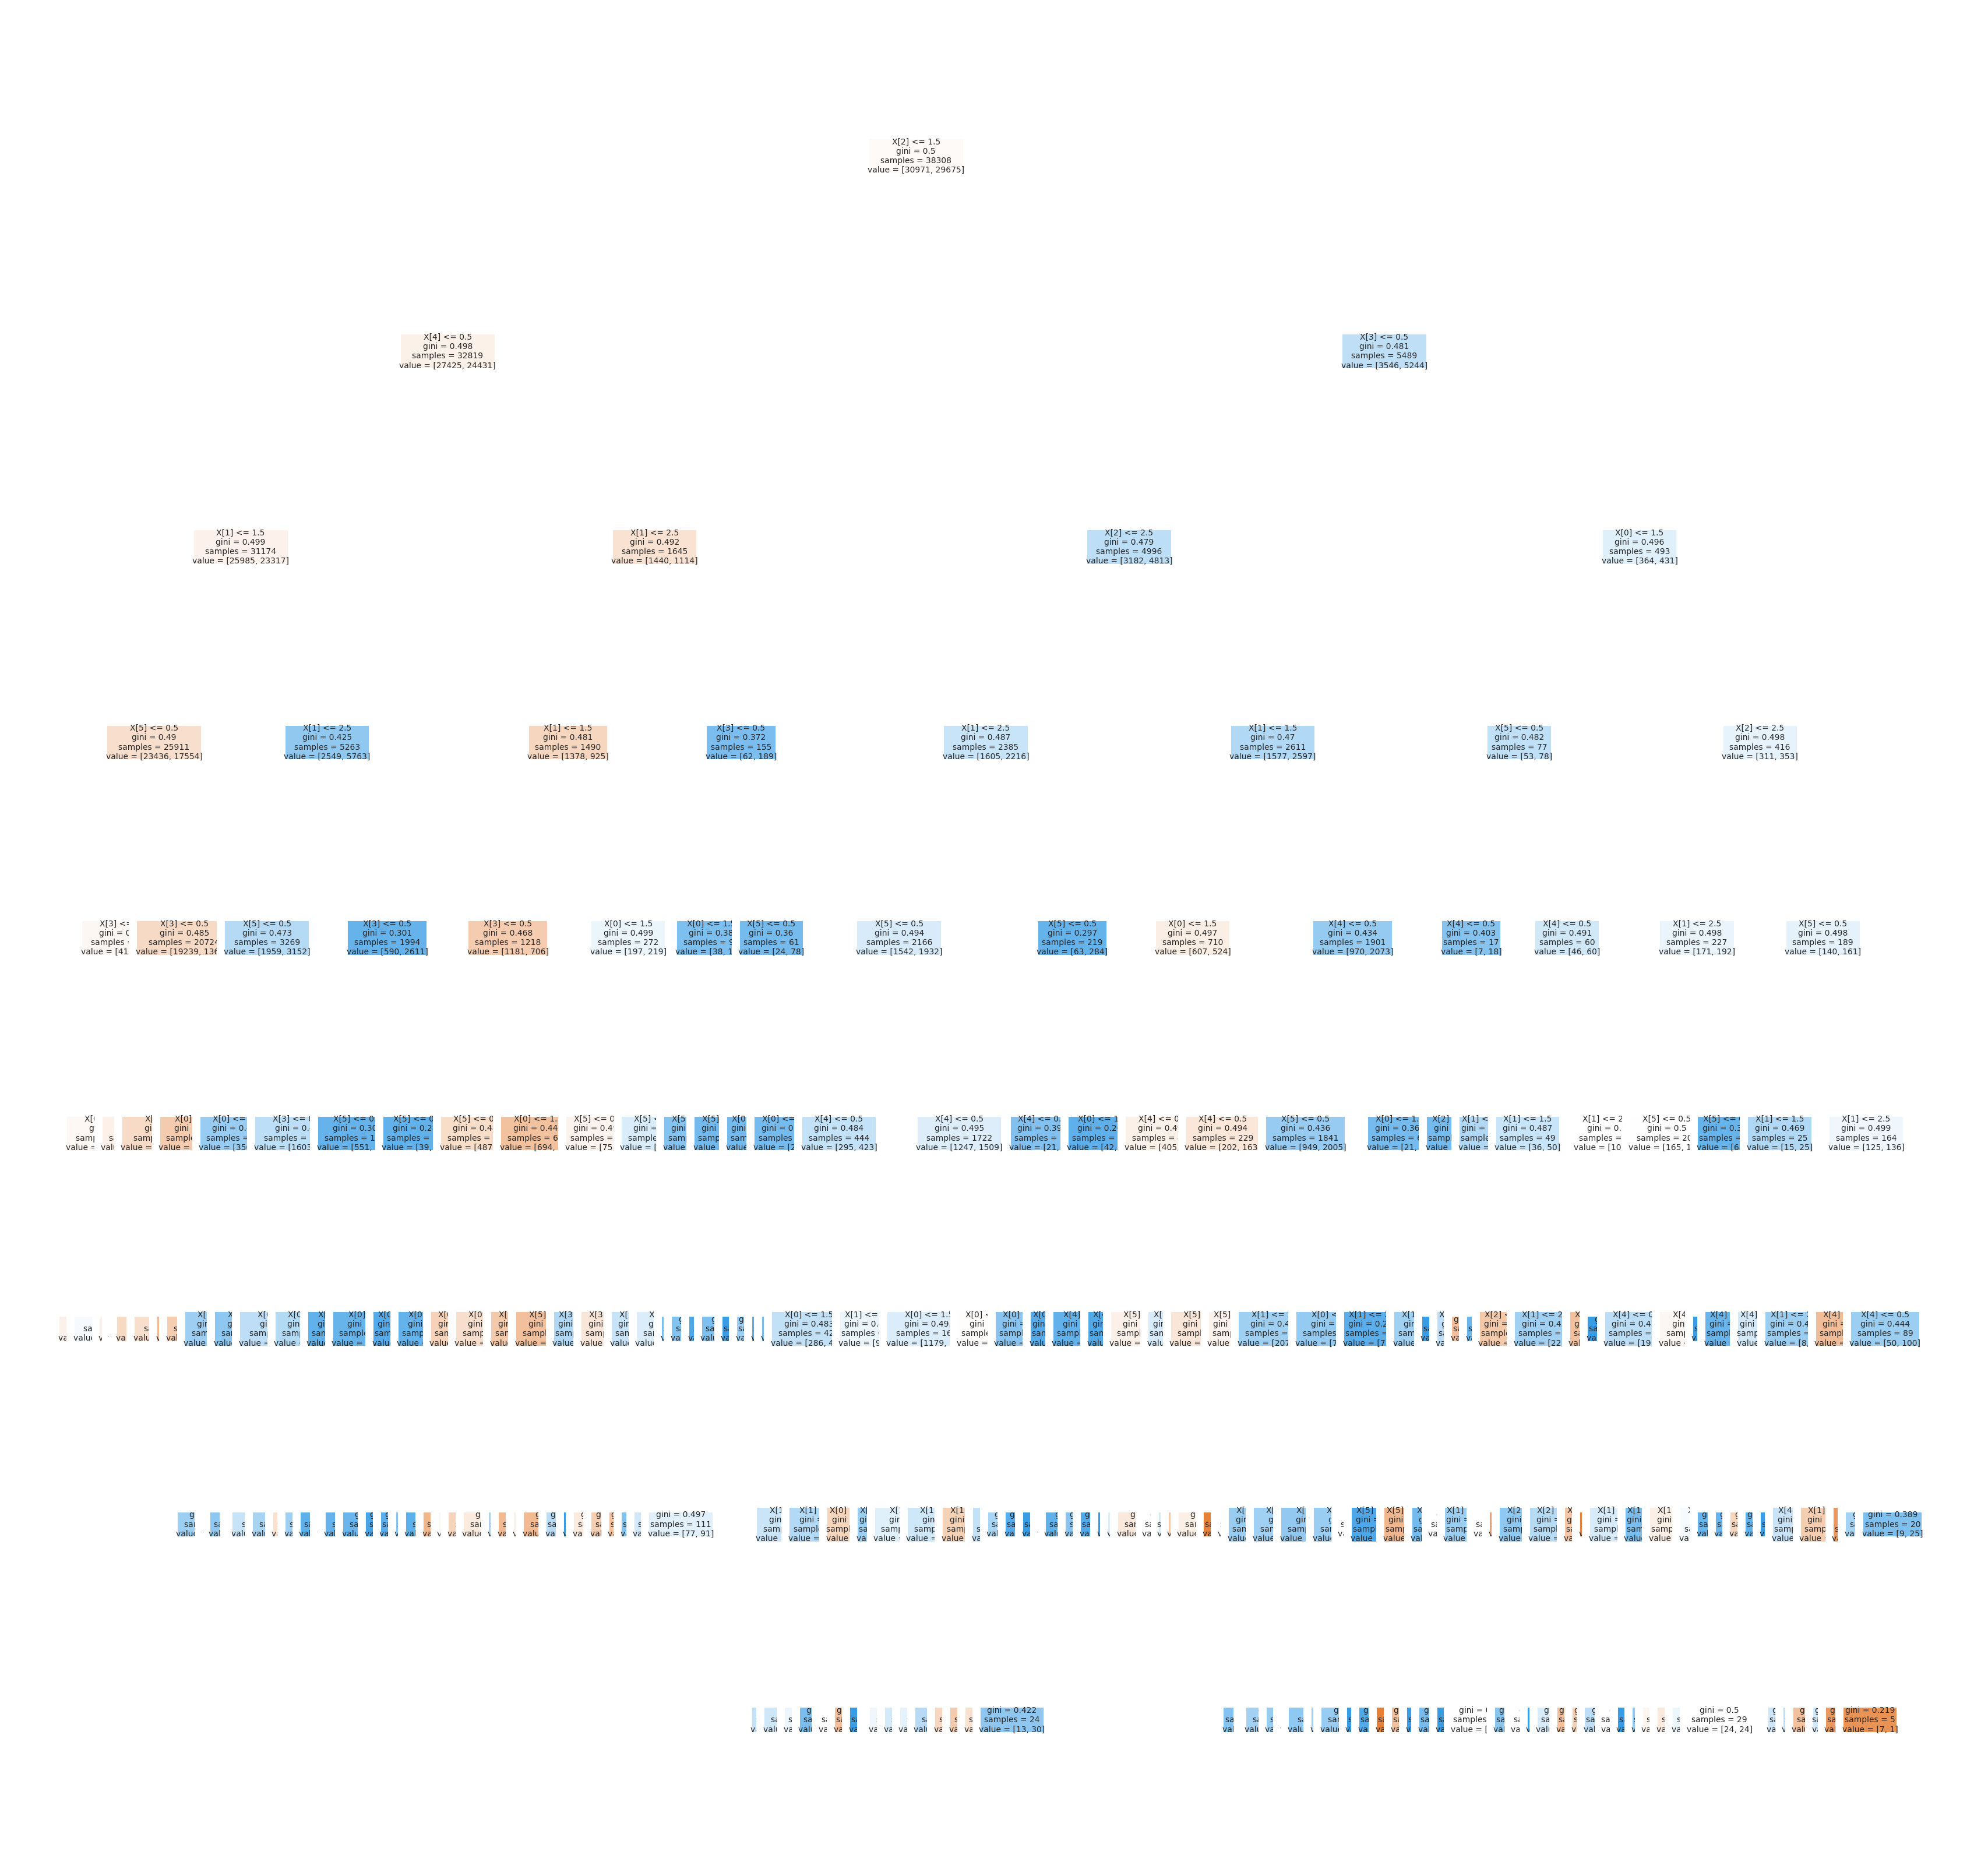

In [170]:
numero_arbol = 7
arbolDelBosque = bosque.estimators_[numero_arbol]

plt.figure(figsize = (4, 4), dpi = 1000)
treeClassifier.plot_tree(arbolDelBosque, filled = True);
plt.show()